In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime as dt

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

In [71]:
#ally_direct = pd.read_csv("./alliances/alliance_v4.1_by_directed.csv")
#ally_direct_year = pd.read_csv("/alliances/alliance_v4.1_by_directed_yearly.csv")
ally_dyad = pd.read_csv("./alliances/alliance_v4.1_by_dyad.csv")
#ally_dyad_year = pd.read_csv("/alliances/alliance_v4.1_by_dyad_yearly.csv")
#ally_member = pd.read_csv("/alliances/alliance_v4.1_by_member.csv")
#ally_member_year = pd.read_csv("/alliances/alliance_v4.1_by_member_yearly.csv")

In [72]:
ally_dyad.info()
#Extra column 'asymmetric' if the alliance only applies one way
ally_dyad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   version4id      3222 non-null   int64  
 1   ccode1          3222 non-null   int64  
 2   state_name1     3222 non-null   object 
 3   ccode2          3222 non-null   int64  
 4   state_name2     3222 non-null   object 
 5   dyad_st_day     3222 non-null   int64  
 6   dyad_st_month   3222 non-null   int64  
 7   dyad_st_year    3222 non-null   int64  
 8   dyad_end_day    1626 non-null   float64
 9   dyad_end_month  1626 non-null   float64
 10  dyad_end_year   1626 non-null   float64
 11  left_censor     3222 non-null   int64  
 12  right_censor    3222 non-null   int64  
 13  defense         3222 non-null   int64  
 14  neutrality      3222 non-null   int64  
 15  nonaggression   3222 non-null   int64  
 16  entente         3221 non-null   float64
 17  asymmetric      3222 non-null   i

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
0,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,NaN,1,1,1,0,1,0.0,0,4.1
1,2,200,United Kingdom,380,Sweden,1,1,1816,15.0,2.0,1911.0,1,0,0,0,0,1.0,0,4.1
2,3,240,Hanover,245,Bavaria,1,1,1838,15.0,3.0,1848.0,0,0,1,0,1,1.0,0,4.1
3,3,240,Hanover,245,Bavaria,29,11,1850,15.0,6.0,1866.0,0,0,1,0,1,1.0,0,4.1
4,3,240,Hanover,255,Germany,1,1,1838,15.0,3.0,1848.0,0,0,1,0,1,1.0,0,4.1


In [73]:
print("There are",ally_dyad['version4id'].nunique(),"alliances in the dataset.")

There are 414 alliances in the dataset.


In [74]:
ally_dyad.isnull().sum()

version4id           0
ccode1               0
state_name1          0
ccode2               0
state_name2          0
dyad_st_day          0
dyad_st_month        0
dyad_st_year         0
dyad_end_day      1596
dyad_end_month    1596
dyad_end_year     1596
left_censor          0
right_censor         0
defense              0
neutrality           0
nonaggression        0
entente              1
asymmetric           0
version              0
dtype: int64

In [75]:
# The entry with a missing value
ally_dyad[ally_dyad['entente'].isnull()]

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
352,122,630,Iran,640,Turkey,22,4,1926,8.0,7.0,1937.0,0,0,0,1,1,NaN,0,4.1


In [76]:
# Value missing from alliance_direct
ally_dyad[ally_dyad['version4id'] == 6]

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
94,6,200,United Kingdom,255,Germany,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1
95,6,200,United Kingdom,300,Austria-Hungary,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1
96,6,200,United Kingdom,365,Russia,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1
97,6,255,Germany,300,Austria-Hungary,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1
98,6,255,Germany,365,Russia,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1
99,6,300,Austria-Hungary,365,Russia,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1


In [77]:
# Alliances starting prior to 1816
ally_dyad[ally_dyad['left_censor'] == 1]

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
0,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,NaN,1,1,1,0,1,0.0,0,4.1
1,2,200,United Kingdom,380,Sweden,1,1,1816,15.0,2.0,1911.0,1,0,0,0,0,1.0,0,4.1
20,3,245,Bavaria,255,Germany,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
22,3,245,Bavaria,267,Baden,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
24,3,245,Bavaria,269,Saxony,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
26,3,245,Bavaria,271,Wuerttemburg,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
28,3,245,Bavaria,273,Hesse Electoral,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
30,3,245,Bavaria,275,Hesse Grand Ducal,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
34,3,245,Bavaria,300,Austria-Hungary,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
36,3,255,Germany,267,Baden,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1


In [78]:
# Converting the 0 / 1 to be True and False
#ally_dyad['asymmetric'] = ally_dyad['asymmetric'].astype(bool)

# Count asymmetric alliances
asymmetric_count = ally_dyad['asymmetric'].sum()
symmetric_count = len(ally_dyad) - asymmetric_count

print("Number of asymmetric alliances:", asymmetric_count)
print("Number of symmetric alliances:", symmetric_count)

Number of asymmetric alliances: 245
Number of symmetric alliances: 2977


In [79]:
print("There are ",ally_dyad['left_censor'].sum(), " alliances that started prior to 1816, which is ", ally_dyad['left_censor'].sum()/len(ally_dyad)*100, "% of the alliances.")

print(max(ally_dyad['version']))

There are  38  alliances that started prior to 1816, which is  1.1793916821849781 % of the alliances.
4.1


In [80]:
# Count the number of alliances per country
counts1 = ally_dyad['state_name1'].value_counts()
counts2 = ally_dyad['state_name2'].value_counts()
counts = counts1.add(counts2, fill_value=0).astype(int)

# Create a dataframe with the number of alliances per country
alliance_per_country = pd.DataFrame({'state_name': counts.index, 'no_of_alliances': counts.values})
alliance_per_country.head()

,state_name,no_of_alliances
0,Afghanistan,15
1,Albania,13
2,Algeria,50
3,Angola,28
4,Antigua & Barbuda,44


In [81]:
# Most alliances
print(alliance_per_country.loc[alliance_per_country['no_of_alliances'].idxmax()]['state_name'], " has the most alliances with ", alliance_per_country['no_of_alliances'].max(), " alliances.\n")

# Least alliances
min_states = alliance_per_country[alliance_per_country['no_of_alliances'] == alliance_per_country['no_of_alliances'].min()]

print("The states:", ', '.join(min_states['state_name'].values), " have the least alliances with only", alliance_per_country['no_of_alliances'].min(),"alliance.")

Russia  has the most alliances with  167  alliances.

The states: Bangladesh, Eritrea, Indonesia, Korea, Malaysia, Mauritius, Modena, Parma, South Sudan, Swaziland, Taiwan, Tuscany  have the least alliances with only 1 alliance.


In [82]:
# The average duration of an alliance

durations = pd.DataFrame({'version4id':ally_dyad['version4id'], 'state_name1':ally_dyad['state_name1'], 'state_name2':ally_dyad['state_name2'], 'duration':ally_dyad['dyad_end_year'] - ally_dyad['dyad_st_year']})

durations.head()

,version4id,state_name1,state_name2,duration
0,1,United Kingdom,Portugal,NaN
1,2,United Kingdom,Sweden,95.0
2,3,Hanover,Bavaria,10.0
3,3,Hanover,Bavaria,16.0
4,3,Hanover,Germany,10.0


In [83]:
total_ongoing_alliances = durations['duration'].isna().sum()
duration_count = len(durations)
print("There are", total_ongoing_alliances, "alliances in the dataset out of the",duration_count,"that have not ended which is",total_ongoing_alliances/duration_count*100,"%\n")

duration_mean = durations['duration'].mean()
duration_mode = durations['duration'].mode()
duration_median = durations['duration'].median()


print("Max: {} years\nMean: {} years\nMedian: {} years\nMode: {} years".format(max(durations['duration'].dropna()), duration_mean.round(),duration_median,duration_mode.values[0]))


There are 1596 alliances in the dataset out of the 3222 that have not ended which is 49.534450651769085 %

Max: 95.0 years
Mean: 9.0 years
Median: 5.0 years
Mode: 2.0 years


Number of modes: 1
The distribution is unimodal.


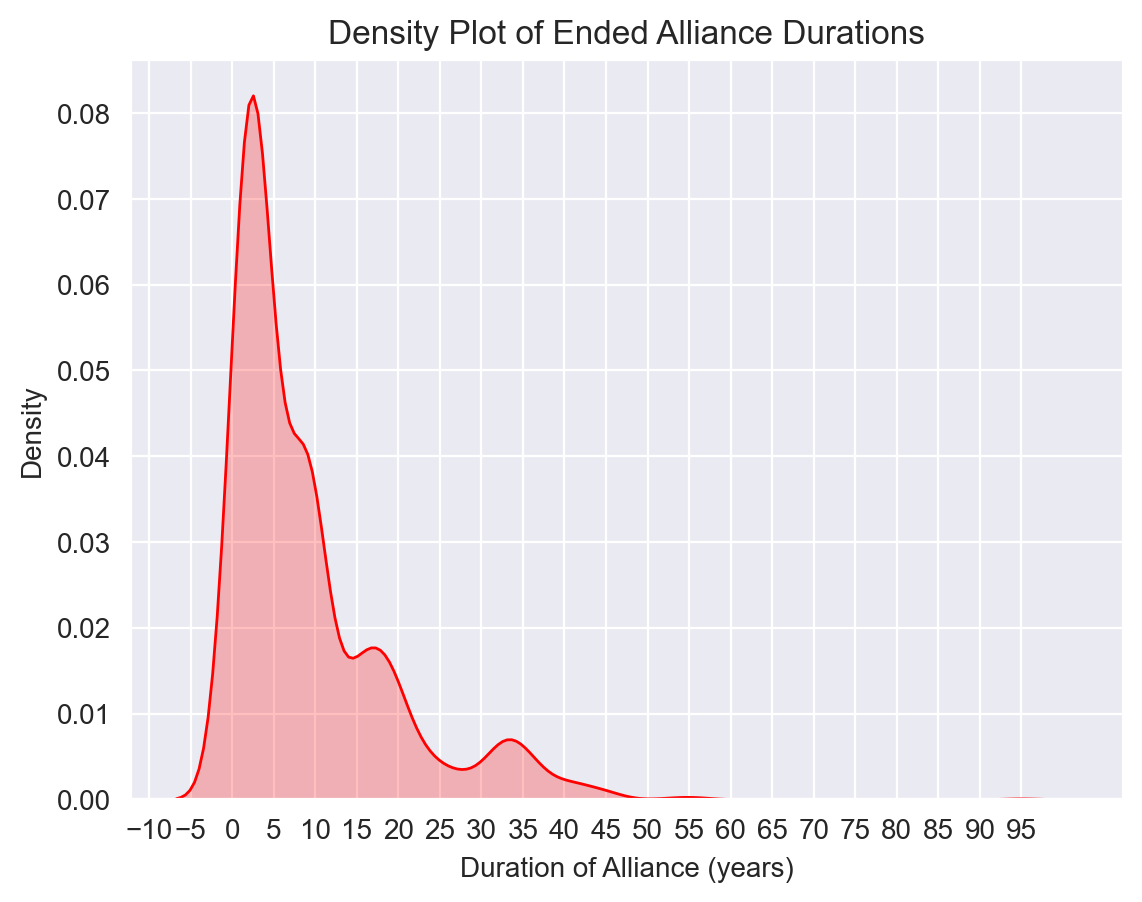

In [84]:
# Plot the kernel density estimation (KDE) plot
sns.kdeplot(durations['duration'], fill=True, color='red')
plt.xlabel('Duration of Alliance (years)')
plt.ylabel('Density')
plt.title('Density Plot of Ended Alliance Durations')

# Determine the number of modes
num_modes = len(duration_mode)

# Print the number of modes
print("Number of modes:", num_modes)

# Determine if the distribution is unimodal, bimodal, or multimodal
if num_modes == 1:
    print("The distribution is unimodal.")
elif num_modes == 2:
    print("The distribution is bimodal.")
else:
    print("The distribution is multimodal.")

plt.xticks(range(-10,100,5))
plt.show()


In [85]:
# On going alliances duration as of 31/12/12

valid_alliances = ally_dyad[ally_dyad['right_censor'] == 1]

valid_durations = pd.DataFrame({'version4id':valid_alliances['version4id'], 'state_name1':valid_alliances['state_name1'], 'state_name2':valid_alliances['state_name2'], 'duration':2013 - valid_alliances['dyad_st_year']})

valid_durations.head()

,version4id,state_name1,state_name2,duration
0,1,United Kingdom,Portugal,197
279,88,Ecuador,Bolivia,102
670,170,Bolivia,Paraguay,75
696,185,Colombia,Venezuela,74
915,199,Mauritania,Somalia,39


In [86]:
valid_duration_mean = valid_durations['duration'].mean()
valid_duration_mode = valid_durations['duration'].mode()
valid_duration_median = valid_durations['duration'].median()


print("Max: {} years\nMean: {} years\nMedian: {} years\nMode: {} years".format(max(valid_durations['duration']), valid_duration_mean.round(),valid_duration_median,valid_duration_mode.values[0]))

Max: 197 years
Mean: 36.0 years
Median: 32.0 years
Mode: 66 years


Number of modes: 1
The distribution is unimodal.


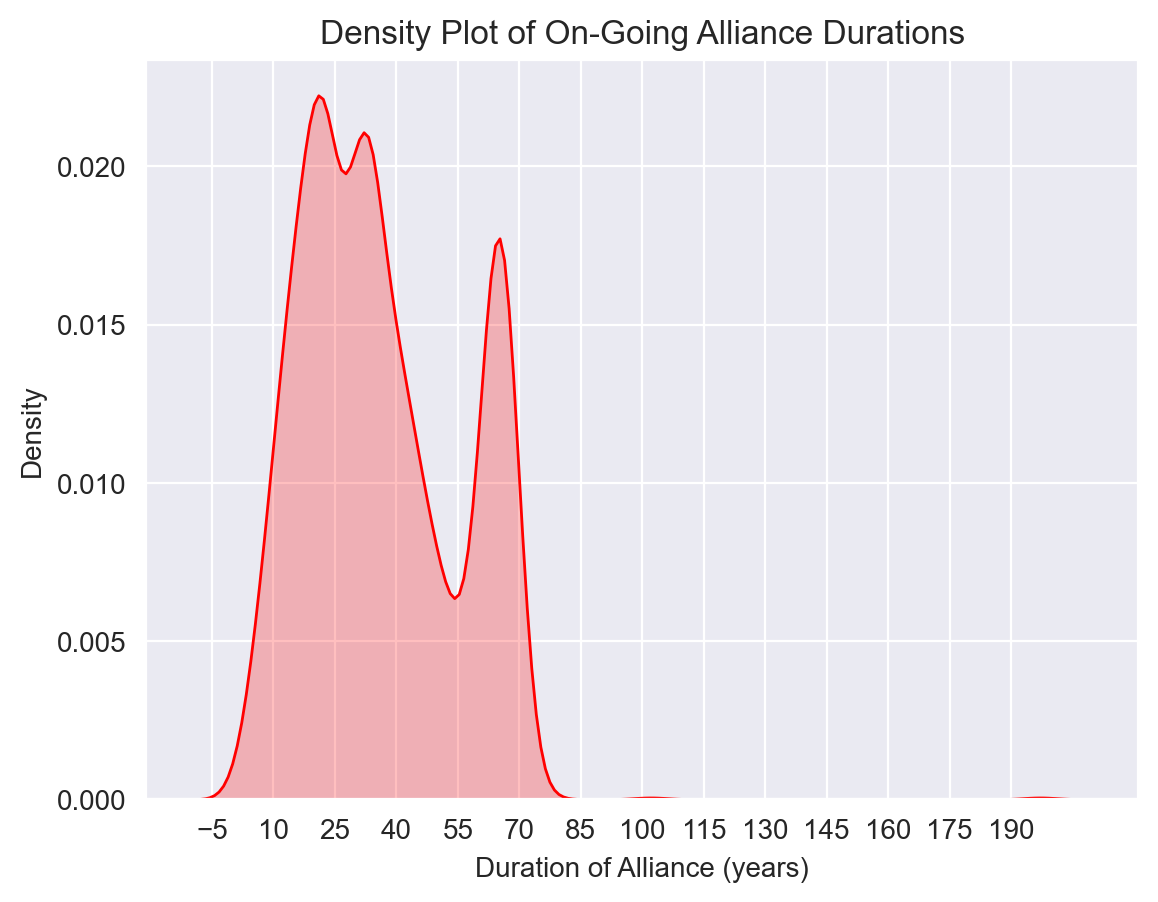

duration
66     190
32     184
24      74
13      73
22      71
18      70
64      66
21      64
42      61
7       56
34      53
23      51
14      51
46      41
49      40
38      40
17      33
29      31
31      30
39      30
62      28
36      24
44      22
52      22
11      22
55      16
25      15
40      15
60      15
41      15
58      12
65      10
68      10
20       9
51       9
19       7
12       5
61       5
59       5
54       3
15       2
8        2
16       2
5        1
4        1
6        1
197      1
9        1
50       1
53       1
63       1
102      1
74       1
75       1
3        1
Name: count, dtype: int64

In [87]:
# Plot the kernel density estimation (KDE) plot
sns.kdeplot(valid_durations['duration'], fill=True,color='red')
plt.xlabel('Duration of Alliance (years)')
plt.ylabel('Density')
plt.title('Density Plot of On-Going Alliance Durations')

# Determine the number of modes
num_modes = len(valid_duration_mode)

# Print the number of modes
print("Number of modes:", num_modes)

# Determine if the distribution is unimodal, bimodal, or multimodal
if num_modes == 1:
    print("The distribution is unimodal.")
elif num_modes == 2:
    print("The distribution is bimodal.")
else:
    print("The distribution is multimodal.")

plt.xticks(range(-5,200,15))
plt.show()
valid_durations['duration'].value_counts()

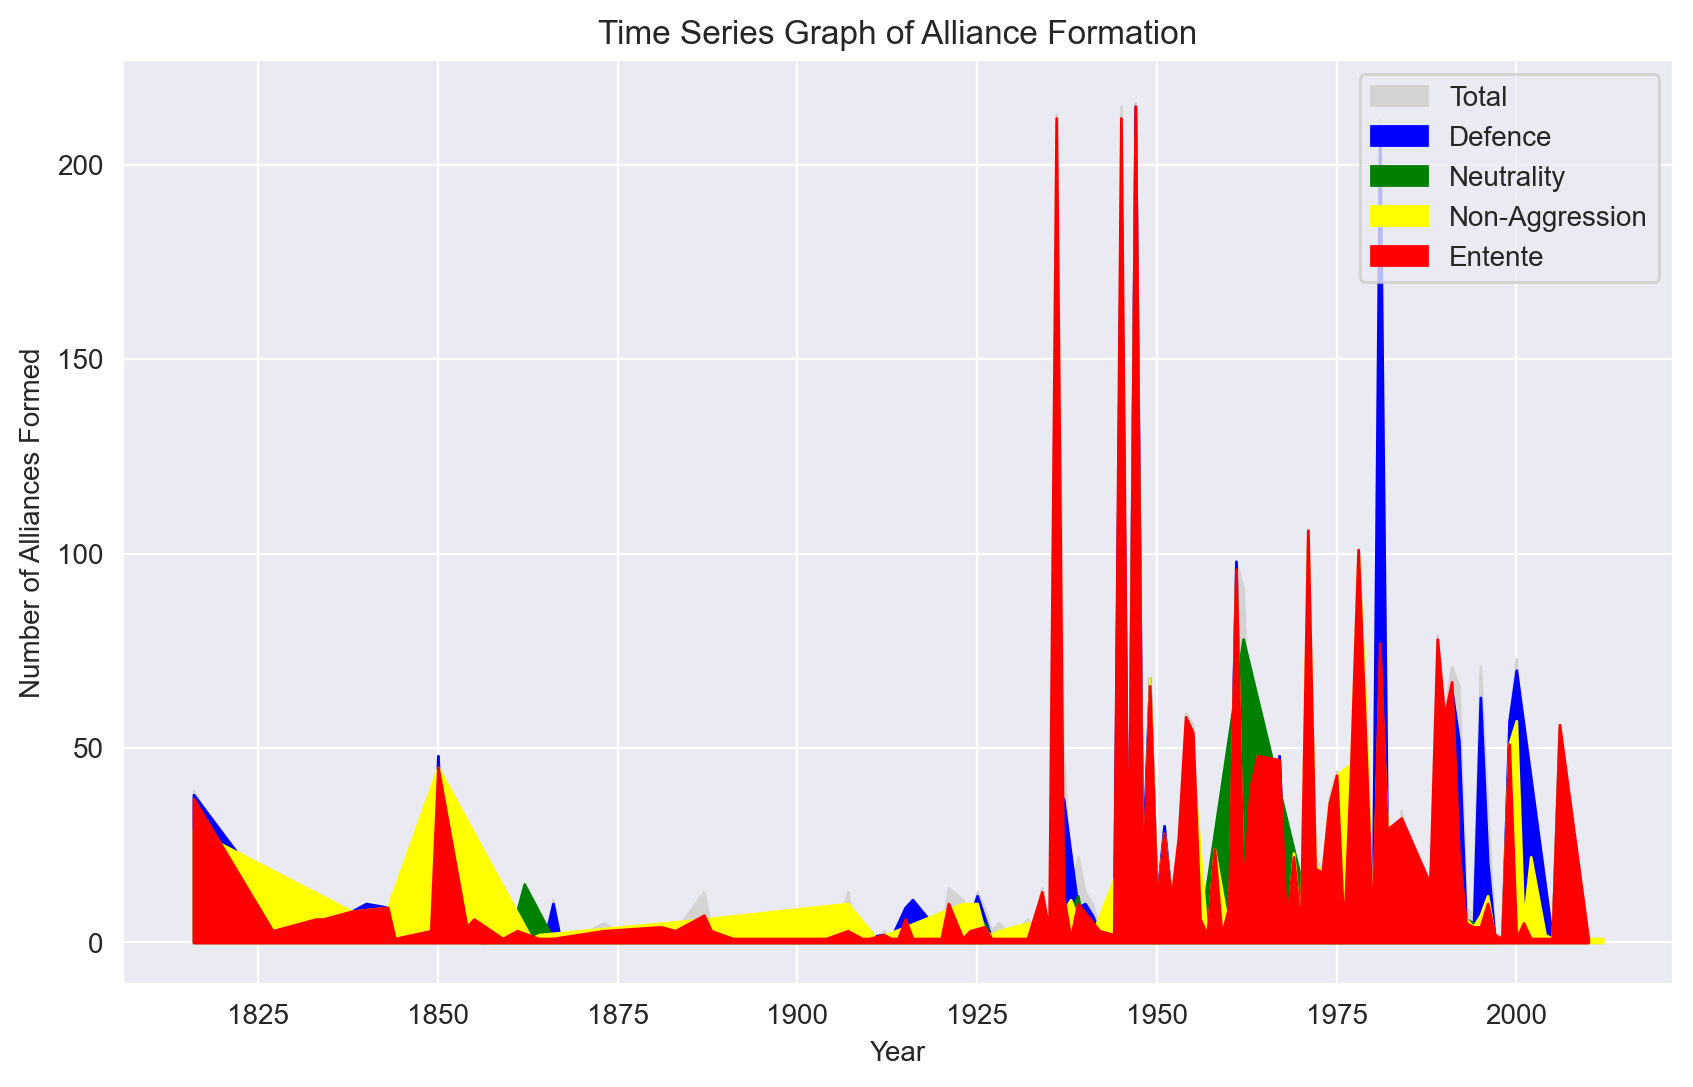

Mean 1956
Median 1962
Mode 1947


In [88]:
# Temporal plot of alliance formation (dyad)

# Filter the dataframe for each alliance type
defense_alliances = ally_dyad[ally_dyad['defense'] == True]
neutrality_alliances = ally_dyad[ally_dyad['neutrality'] == True]
non_aggression_alliances = ally_dyad[ally_dyad['nonaggression'] == True]
entente_alliances = ally_dyad[ally_dyad['entente'] == True]

# Plot the temporal analysis graph
plt.figure(figsize=(10, 6))
plt.fill_between(ally_dyad['dyad_st_year'].value_counts().sort_index().index,
                 ally_dyad['dyad_st_year'].value_counts().sort_index().values,
                 color='lightgrey', label='Total')
plt.fill_between(defense_alliances['dyad_st_year'].value_counts().sort_index().index,
                defense_alliances['dyad_st_year'].value_counts().sort_index().values,
                 color='blue', label='Defence')
plt.fill_between(neutrality_alliances['dyad_st_year'].value_counts().sort_index().index,
                 neutrality_alliances['dyad_st_year'].value_counts().sort_index().values,
                 color='green', label='Neutrality')
plt.fill_between(non_aggression_alliances['dyad_st_year'].value_counts().sort_index().index,
                 non_aggression_alliances['dyad_st_year'].value_counts().sort_index().values,
                 color='yellow', label='Non-Aggression')
plt.fill_between(entente_alliances['dyad_st_year'].value_counts().sort_index().index,
                entente_alliances['dyad_st_year'].value_counts().sort_index().values,
                color='red', label='Entente')


plt.xlabel('Year')
plt.ylabel('Number of Alliances Formed')
plt.title('Time Series Graph of Alliance Formation')
plt.legend()
plt.grid(True)
plt.show()

print("Mean {}\nMedian {}\nMode {}".format(int(ally_dyad['dyad_st_year'].mean().round()),int(ally_dyad['dyad_st_year'].median()),ally_dyad['dyad_st_year'].mode().values[0]))

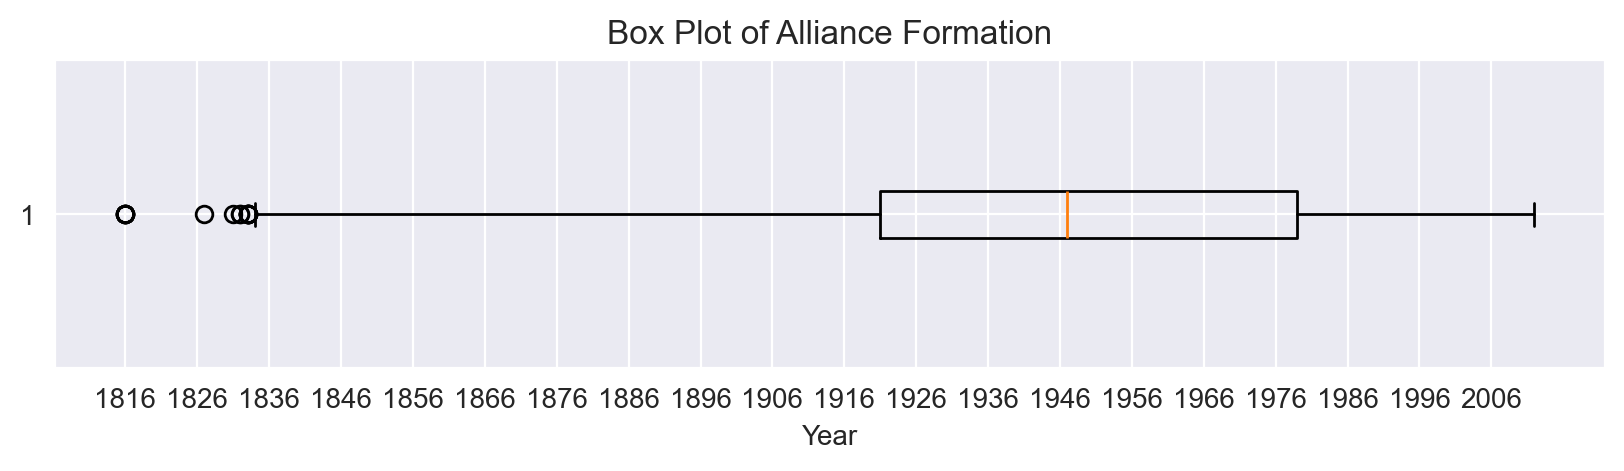

Mean 1940
Median 1947
Mode 1992


In [171]:
# Box Plot of alliance formation

# Only 1 entry per alliance to account for alliances with > 2 members
alliances_df = ally_dyad.drop_duplicates(subset=['version4id'])

# Plotting
plt.figure(figsize=(10, 2))
plt.boxplot(alliances_df['dyad_st_year'],vert=0)
plt.xlabel('Year')
plt.xticks(range(1816,2012,10))
plt.title('Box Plot of Alliance Formation')
plt.show()

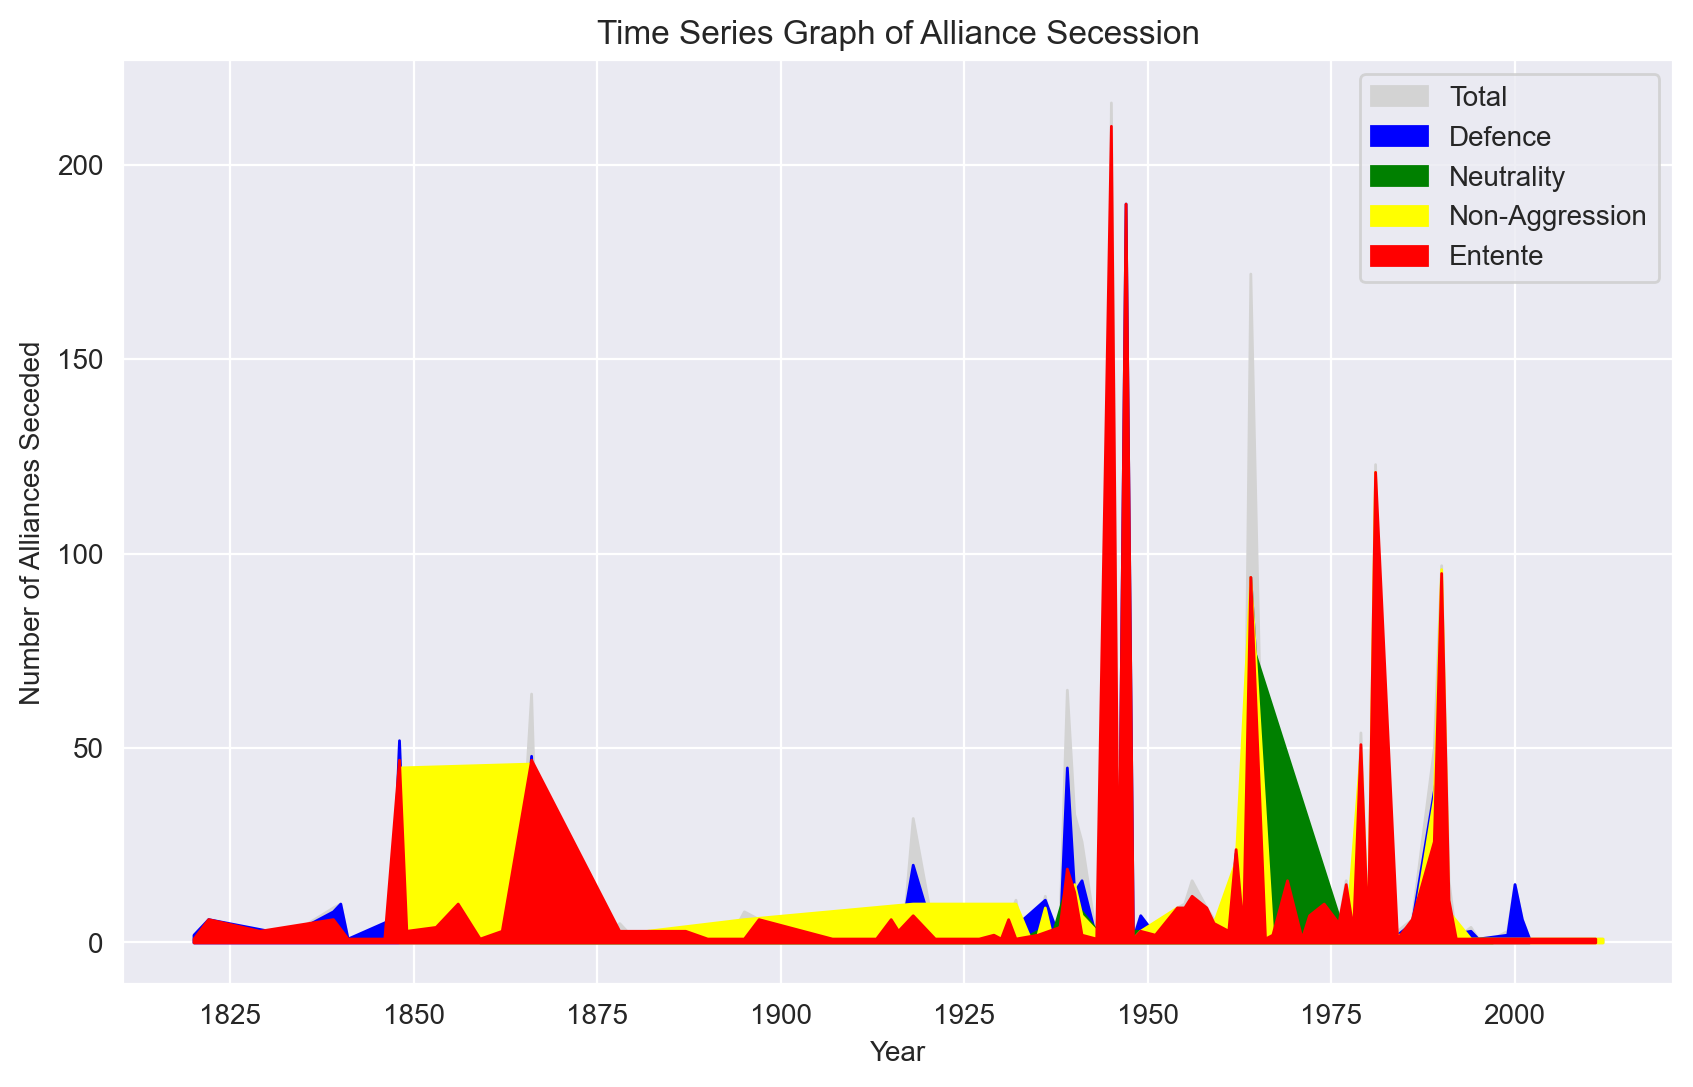

Mean 1944
Median 1947
Mode 1945.0


In [90]:
# Temporal plot of alliance formation

# Filter the dataframe for each alliance type
defense_alliances = ally_dyad[ally_dyad['defense'] == True]
neutrality_alliances = ally_dyad[ally_dyad['neutrality'] == True]
non_aggression_alliances = ally_dyad[ally_dyad['nonaggression'] == True]
entente_alliances = ally_dyad[ally_dyad['entente'] == True]

# Plot the temporal analysis graph
plt.figure(figsize=(10, 6))
plt.fill_between(ally_dyad['dyad_end_year'].value_counts().sort_index().index,
                 ally_dyad['dyad_end_year'].value_counts().sort_index().values,
                 color='lightgrey', label='Total')
plt.fill_between(defense_alliances['dyad_end_year'].value_counts().sort_index().index,
                defense_alliances['dyad_end_year'].value_counts().sort_index().values,
                 color='blue', label='Defence')
plt.fill_between(neutrality_alliances['dyad_end_year'].value_counts().sort_index().index,
                 neutrality_alliances['dyad_end_year'].value_counts().sort_index().values,
                 color='green', label='Neutrality')
plt.fill_between(non_aggression_alliances['dyad_end_year'].value_counts().sort_index().index,
                 non_aggression_alliances['dyad_end_year'].value_counts().sort_index().values,
                 color='yellow', label='Non-Aggression')
plt.fill_between(entente_alliances['dyad_end_year'].value_counts().sort_index().index,
                entente_alliances['dyad_end_year'].value_counts().sort_index().values,
                color='red', label='Entente')


plt.xlabel('Year')
plt.ylabel('Number of Alliances Seceded')
plt.title('Time Series Graph of Alliance Secession')
plt.legend()
plt.grid(True)
plt.show()

print("Mean {}\nMedian {}\nMode {}".format(int(ally_dyad['dyad_end_year'].mean().round()),int(ally_dyad['dyad_end_year'].median()),ally_dyad['dyad_end_year'].mode().values[0]))

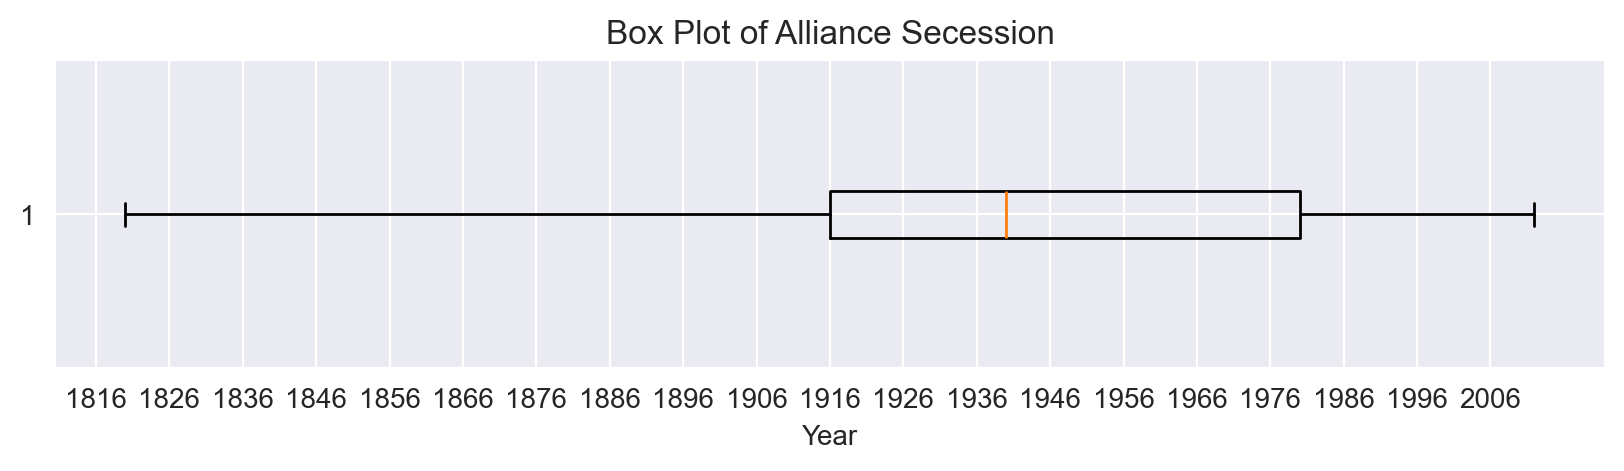

In [170]:
# Box Plot of alliance secession

# Only 1 entry per alliance to account for alliances with > 2 members
alliances_df = ally_dyad.drop_duplicates(subset=['version4id'])

# Plotting
plt.figure(figsize=(10, 2))
plt.boxplot((alliances_df[alliances_df['dyad_end_year'].notnull()])['dyad_end_year'],vert=0)
plt.xlabel('Year')
plt.xticks(range(1816,2012,10))
plt.title('Box Plot of Alliance Secession')
plt.show()

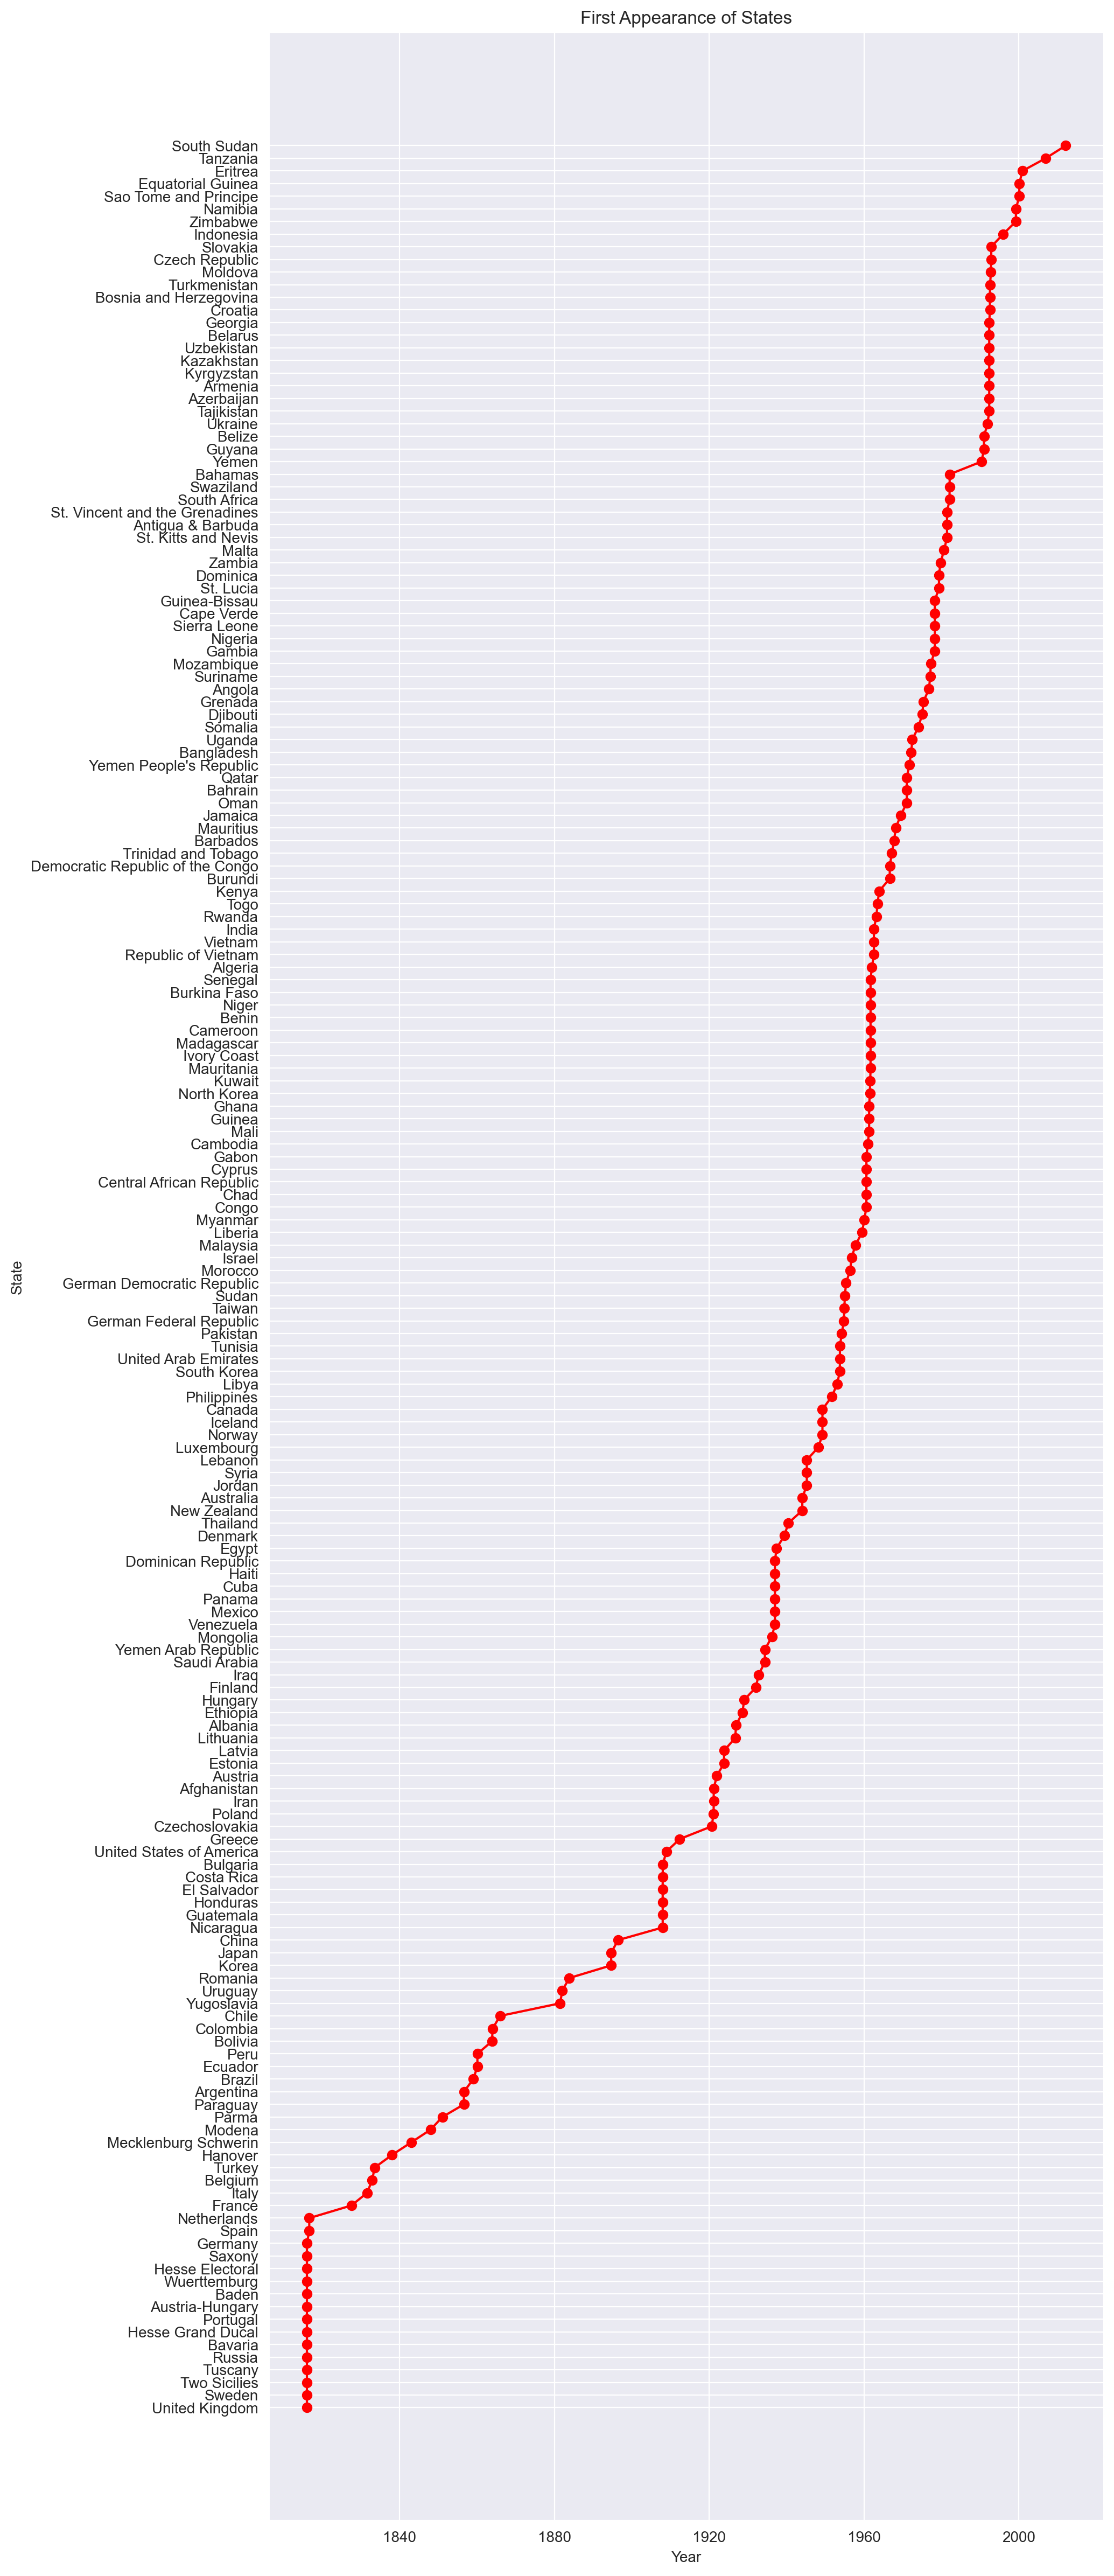

Stats for states entering the dataset:
Mean: 1935-10-27 12:40:00
Median: 1955-11-20 00:00:00
Mode: 1816-01-01T00:00:00.000000000


In [92]:
# Creating a dataframe with a combined start date that is sorted by it
combined_date_df = ally_dyad.drop(['dyad_st_year','dyad_st_day','dyad_st_month'],axis='columns').join(pd.to_datetime(ally_dyad['dyad_st_month'].astype(str)+'/'+ally_dyad['dyad_st_day'].astype(str)+'/'+ally_dyad['dyad_st_year'].astype(str)).rename('date')).sort_values(by='date')

# Getting the first occurance of every state in the dataset
first_occurrence = {}
for state in pd.concat((combined_date_df['state_name1'],combined_date_df['state_name2'])).unique():
    first_occurrence[state] = combined_date_df.loc[(combined_date_df['state_name1'] == state) | (combined_date_df['state_name2'] == state),'date'].min()

first_occurrence_df = pd.DataFrame.from_dict(first_occurrence,orient='index',columns=['date']).sort_values(by='date')

# Plotting the states by their first occurance date
plt.figure(figsize=(10, 30))
plt.plot(first_occurrence_df['date'], first_occurrence_df.index, marker='o', linestyle='-', color='red')
plt.xlabel('Year')
plt.ylabel('State')
plt.title('First Appearance of States')
#plt.xticks(pd.date_range(dt.datetime(1816,1,1),dt.datetime(2012,1,1),10))
plt.show()

# Stats
print("Stats for states entering the dataset:\nMean: {}\nMedian: {}\nMode: {}".format(first_occurrence_df['date'].mean(),first_occurrence_df['date'].median(),first_occurrence_df['date'].mode().values[0]))

In [93]:
ally_dyad[ally_dyad['state_name1']=='Brazil']

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
174,37,140,Brazil,160,Argentina,2,1,1859,14.0,9.0,1864.0,0,0,1,1,0,0.0,0,4.1
201,48,140,Brazil,160,Argentina,1,5,1865,30.0,7.0,1882.0,0,0,1,0,0,0.0,0,4.1
202,48,140,Brazil,165,Uruguay,1,1,1882,30.0,7.0,1882.0,0,0,1,0,0,0.0,0,4.1
611,165,140,Brazil,145,Bolivia,23,12,1936,23.0,3.0,1945.0,0,0,0,0,0,1.0,0,4.1
612,165,140,Brazil,150,Paraguay,23,12,1936,23.0,3.0,1945.0,0,0,0,0,0,1.0,0,4.1
613,165,140,Brazil,155,Chile,23,12,1936,23.0,3.0,1945.0,0,0,0,0,0,1.0,0,4.1
614,165,140,Brazil,160,Argentina,23,12,1936,23.0,3.0,1945.0,0,0,0,0,0,1.0,0,4.1
615,165,140,Brazil,165,Uruguay,23,12,1936,23.0,3.0,1945.0,0,0,0,0,0,1.0,0,4.1
900,198,140,Brazil,145,Bolivia,6,3,1945,2.0,9.0,1947.0,0,0,1,0,0,1.0,0,4.1
901,198,140,Brazil,150,Paraguay,6,3,1945,2.0,9.0,1947.0,0,0,1,0,0,1.0,0,4.1


In [136]:
# Nato alliance hasn't been updated since 1999
nato_df = ally_dyad[ally_dyad['version4id'] == 227]
print("There are {} countries in Nato".format(pd.concat((nato_df['state_name1'],nato_df['state_name2'])).nunique()))

nato_df
#pd.concat([nato_df[nato_df['state_name1'] == 'Yugoslavia'],nato_df[nato_df['state_name1'] == 'Yugoslavia']])
#pd.concat((nato_df['state_name1'],nato_df['state_name2'])).unique()

# 8 members are missing including slovenia and slovakia. the former of which has no alliances in the dataset

#ally_dyad[ally_dyad['ccode2'] == 317]
#ally_dyad[ally_dyad['ccode1'] == 317]
#ally_dyad[ally_dyad['state_name1'] == 'Albania']
#ally_dyad[ally_dyad['state_name2'] == 'Albania']

There are 20 countries in Nato


,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
1817,227,2,United States of America,20,Canada,4,4,1949,NaN,NaN,NaN,0,1,1,0,1,1.0,0,4.1
1818,227,2,United States of America,200,United Kingdom,4,4,1949,NaN,NaN,NaN,0,1,1,0,1,1.0,0,4.1
1819,227,2,United States of America,210,Netherlands,4,4,1949,NaN,NaN,NaN,0,1,1,0,1,1.0,0,4.1
1820,227,2,United States of America,211,Belgium,4,4,1949,NaN,NaN,NaN,0,1,1,0,1,1.0,0,4.1
1821,227,2,United States of America,212,Luxembourg,4,4,1949,NaN,NaN,NaN,0,1,1,0,1,1.0,0,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,227,385,Norway,395,Iceland,4,4,1949,NaN,NaN,NaN,0,1,1,0,1,1.0,0,4.1
2000,227,385,Norway,640,Turkey,22,10,1951,NaN,NaN,NaN,0,1,1,0,1,1.0,1,4.1
2001,227,390,Denmark,395,Iceland,4,4,1949,NaN,NaN,NaN,0,1,1,0,1,1.0,0,4.1
2002,227,390,Denmark,640,Turkey,22,10,1951,NaN,NaN,NaN,0,1,1,0,1,1.0,1,4.1


In [164]:
# Number of states per alliance, version4id starts at 1 not 0 so -1 for searching IDs
no_states_alliance = pd.DataFrame(columns=['version4id','no_states'])
for uid in ally_dyad['version4id'].unique():
    no_states_alliance.loc[len(no_states_alliance)] = {'version4id':uid,'no_states':pd.concat([(ally_dyad[ally_dyad['version4id'] == uid])['state_name1'],(ally_dyad[ally_dyad['version4id'] == uid])['state_name2']]).nunique()}

max_states = max(no_states_alliance['no_states'])
print("{} has the max number of states in an alliance with {}\nMean {}\nMedian {}\nMode {}".format((no_states_alliance[no_states_alliance['no_states'] == max_states])['version4id'].values[0],  max_states,no_states_alliance['no_states'].mean(),no_states_alliance['no_states'].median(),no_states_alliance['no_states'].mode().values[0]))

# State Names of the Rio Pact
#pd.concat([(ally_dyad[ally_dyad['version4id'] == 210])['state_name1'],(ally_dyad[ally_dyad['version4id'] == 210])['state_name2']]).unique()

print("There are {} alliances with more than 2 states".format(len(no_states_alliance[no_states_alliance['no_states'] > 2])))
#no_states_alliance

210 has the max number of states in an alliance with 35
Mean 2.9009661835748792
Median 2.0
Mode 2
There are 88 alliances with more than 2 states


In [156]:
# Rio Pact
rio_pact_df = ally_dyad[ally_dyad['version4id'] == 210]

# States in the Rio Pact
#pd.concat([rio_pact_df['state_name1'],rio_pact_df['state_name2']]).unique()

# Specific countries involvement in the treaty
#pd.concat([rio_pact_df[rio_pact_df['state_name1'] == 'Jamaica'],rio_pact_df[rio_pact_df['state_name2'] == 'Jamaica']])
pd.concat((rio_pact_df['state_name1'], rio_pact_df['state_name2'])).unique()

array(['United States of America', 'Canada', 'Bahamas', 'Cuba', 'Haiti',
       'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Barbados',
       'Dominica', 'Grenada', 'St. Lucia',
       'St. Vincent and the Grenadines', 'Antigua & Barbuda',
       'St. Kitts and Nevis', 'Mexico', 'Belize', 'Guatemala', 'Honduras',
       'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama', 'Colombia',
       'Venezuela', 'Guyana', 'Suriname', 'Ecuador', 'Peru', 'Brazil',
       'Bolivia', 'Paraguay', 'Chile', 'Argentina', 'Uruguay'],
      dtype=object)

In [155]:
seato_df = ally_dyad[ally_dyad['version4id'] == 238]
pd.concat((seato_df['state_name1'], seato_df['state_name2'])).unique()

array(['United States of America', 'United Kingdom', 'France', 'Pakistan',
       'Thailand', 'Philippines', 'Australia', 'New Zealand'],
      dtype=object)

In [154]:
warsaw_pact_df = ally_dyad[ally_dyad['version4id'] == 243]
pd.concat((warsaw_pact_df['state_name1'], warsaw_pact_df['state_name2'])).unique()

array(['German Democratic Republic', 'Poland', 'Hungary',
       'Czechoslovakia', 'Albania', 'Bulgaria', 'Romania', 'Russia'],
      dtype=object)

In [158]:
csto_df = ally_dyad[ally_dyad['version4id'] == 350]
pd.Series(pd.concat((csto_df['state_name1'], csto_df['state_name2'])).unique()).rename('state')

0        Russia
1       Belarus
2       Armenia
3       Georgia
4    Azerbaijan
5    Tajikistan
6    Kyrgyzstan
7    Uzbekistan
8    Kazakhstan
Name: state, dtype: object